In [1]:
!pip install polars

In [2]:
import polars as pl
import numpy as np
from CKA import *
import seaborn as sns
from tqdm import tqdm
import itertools
import multiprocessing as mp
import itertools

In [3]:
df1 = pl.read_parquet('embeddings/model_RInceptionTimeClassifier__dataset_Car__seed_0__set_test.parquet')
df2 = pl.read_parquet('embeddings/model_RCNNClassifier__dataset_Car__seed_0__set_test.parquet')

In [4]:
df1

shape: (3_840, 10)
┌─────────────────────┬──────┬────────────┬─────────┬───┬───────────┬─────────────┬─────────┬──────┐
│ model               ┆ seed ┆ layer      ┆ n_layer ┆ … ┆ n_example ┆ embedding   ┆ dataset ┆ set  │
│ ---                 ┆ ---  ┆ ---        ┆ ---     ┆   ┆ ---       ┆ ---         ┆ ---     ┆ ---  │
│ str                 ┆ i64  ┆ str        ┆ i64     ┆   ┆ i64       ┆ list[f32]   ┆ str     ┆ str  │
╞═════════════════════╪══════╪════════════╪═════════╪═══╪═══════════╪═════════════╪═════════╪══════╡
│ RInceptionTimeClass ┆ 0    ┆ InputLayer ┆ 0       ┆ … ┆ 0         ┆ [1.427302,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 1.384593, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 1.39173…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ InputLayer ┆ 0       ┆ … ┆ 1         ┆ [1.628785,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 1.591614, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 1.58594…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ InputLayer ┆ 0       ┆ … ┆ 2         ┆ [1.652645,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 1.612844, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 1.61328…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ InputLayer ┆ 0       ┆ … ┆ 3         ┆ [2.029325,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 1.992633, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 2.03567…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ InputLayer ┆ 0       ┆ … ┆ 4         ┆ [1.726372,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 1.681502, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 1.68539…    ┆         ┆      │
│ …                   ┆ …    ┆ …          ┆ …       ┆ … ┆ …         ┆ …           ┆ …       ┆ …    │
│ RInceptionTimeClass ┆ 0    ┆ Dense      ┆ 63      ┆ … ┆ 55        ┆ [0.993191,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 0.000354, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 0.00626…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ Dense      ┆ 63      ┆ … ┆ 56        ┆ [0.83298,   ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 0.000213, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 0.164953…   ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ Dense      ┆ 63      ┆ … ┆ 57        ┆ [0.022898,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 0.041907, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 0.43983…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ Dense      ┆ 63      ┆ … ┆ 58        ┆ [0.003028,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 0.005463, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 0.02808…    ┆         ┆      │
│ RInceptionTimeClass ┆ 0    ┆ Dense      ┆ 63      ┆ … ┆ 59        ┆ [0.000228,  ┆ Car     ┆ test │
│ ifier               ┆      ┆            ┆         ┆   ┆           ┆ 0.001811, … ┆         ┆      │
│                     ┆      ┆            ┆         ┆   ┆           ┆ 0.90226…    ┆         ┆      │
└─────────────────────┴──────┴────────────┴─────────┴───┴───────────┴─────────────┴─────────┴──────┘

In [5]:
def pairwise_similarities(df1, df2):
    layers1 = sorted(df1['n_layer'].unique().to_list())
    layers2 = sorted(df2['n_layer'].unique().to_list())
    layer_pairs = list(itertools.product(layers1, layers2))

    df1 = df1.sort('n_example')
    df2 = df2.sort('n_example')
    
    sorted_embeddings1 = {
        i: np.array(df1.filter(pl.col('n_layer') == i)['embedding'].to_list()) 
        for i in layers1
    }
    sorted_embeddings2 = {
        j: np.array(df2.filter(pl.col('n_layer') == j)['embedding'].to_list()) 
        for j in layers2
    }
    
    cka = CKA()

    similarities = []
    for i, j in tqdm(layer_pairs, total=len(layer_pairs)):
        E1 = sorted_embeddings1[i]
        E2 = sorted_embeddings2[j]
        s = cka.kernel_CKA(E1, E2)
        similarities.append({'n_layer1': i, 'n_layer2': j, 'cka': s})
    return pl.DataFrame(similarities)

s_df1_df1 = pairwise_similarities(df1, df1)
s_df1_df2 = pairwise_similarities(df1, df2)
s_df2_df2 = pairwise_similarities(df2, df2)

100%|██████████| 121/121 [00:00<00:00, 234.80it/s]


In [6]:
s_df1_df1

shape: (4_096, 3)
┌──────────┬──────────┬──────────┐
│ n_layer1 ┆ n_layer2 ┆ cka      │
│ ---      ┆ ---      ┆ ---      │
│ i64      ┆ i64      ┆ f64      │
╞══════════╪══════════╪══════════╡
│ 0        ┆ 0        ┆ 1.0      │
│ 0        ┆ 1        ┆ 0.999979 │
│ 0        ┆ 2        ┆ 0.99998  │
│ 0        ┆ 3        ┆ 0.99999  │
│ 0        ┆ 4        ┆ 0.999999 │
│ …        ┆ …        ┆ …        │
│ 63       ┆ 59       ┆ 0.828289 │
│ 63       ┆ 60       ┆ 0.783836 │
│ 63       ┆ 61       ┆ 0.818717 │
│ 63       ┆ 62       ┆ 0.900288 │
│ 63       ┆ 63       ┆ 1.0      │
└──────────┴──────────┴──────────┘

/tmp/ipykernel_103274/1153482129.py:1: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pdf = s_df1_df1.pivot(


<Axes: >

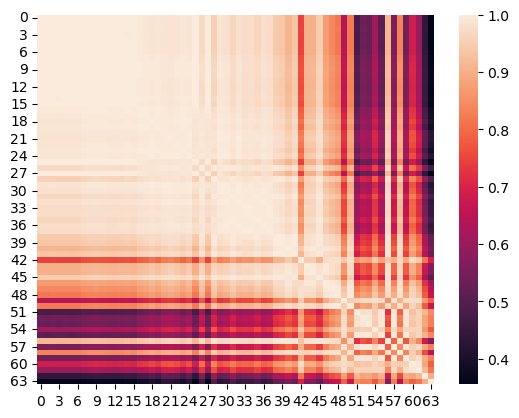

In [7]:
pdf = s_df1_df1.pivot(
    values="cka",
    index="n_layer1",
    columns="n_layer2"
).drop('n_layer1').to_numpy()#[1:-1, 1:-1]
sns.heatmap(pdf, annot=False)

/tmp/ipykernel_103274/3419392288.py:1: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pdf = s_df1_df2.pivot(


<Axes: >

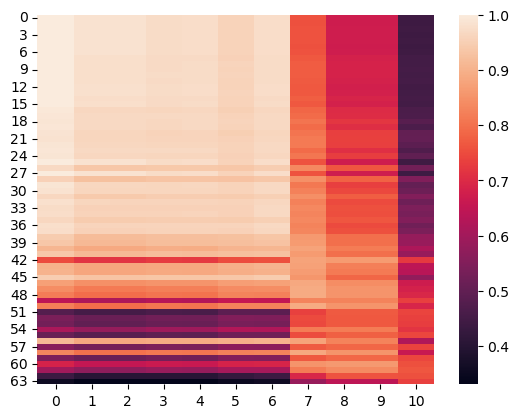

In [8]:
pdf = s_df1_df2.pivot(
    values="cka",
    index="n_layer1",
    columns="n_layer2"
).drop('n_layer1').to_numpy()#[1:-1, 1:-1]
sns.heatmap(pdf, annot=False)

/tmp/ipykernel_103274/80466229.py:1: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pdf = s_df2_df2.pivot(


<Axes: >

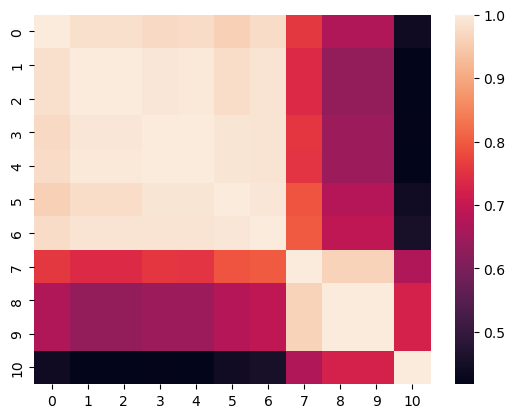

In [9]:
pdf = s_df2_df2.pivot(
    values="cka",
    index="n_layer1",
    columns="n_layer2"
).drop('n_layer1').to_numpy()#[1:-1, 1:-1]
sns.heatmap(pdf, annot=False)